<a href="https://colab.research.google.com/github/bhavyasriambati/Projects/blob/main/taxifare.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Libraries**



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
ln=pd.read_csv("/content/TaxiFare (2).csv")

In [3]:
ln.head()


,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [4]:
ln.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   unique_id             50000 non-null  object 
 1   amount                50000 non-null  float64
 2   date_time_of_pickup   50000 non-null  object 
 3   longitude_of_pickup   50000 non-null  float64
 4   latitude_of_pickup    50000 non-null  float64
 5   longitude_of_dropoff  50000 non-null  float64
 6   latitude_of_dropoff   50000 non-null  float64
 7   no_of_passenger       50000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 3.1+ MB


In [5]:
ln["amount"].describe() 


count    50000.000000
mean        11.364171
std          9.685557
min         -5.000000
25%          6.000000
50%          8.500000
75%         12.500000
max        200.000000
Name: amount, dtype: float64

In [6]:
index_names = ln[ln["amount"]<2.5].index
index_names

Int64Index([2039, 2486, 2780, 10002, 13032, 27891, 28839, 36722, 42337, 47302], dtype='int64')

In [7]:
ln.drop(index_names,inplace=True)

In [8]:
ln["X1"] = ln["latitude_of_pickup"]
ln["X2"] = ln["latitude_of_dropoff"]
ln["Y1"] = ln["longitude_of_pickup"]
ln["Y2"] = ln["longitude_of_dropoff"]


In [9]:
ln["Distance_Travel"] = np.sqrt((np.square(ln["X1"]-ln["X2"]))+(np.square(ln["Y1"]-ln["Y2"])))


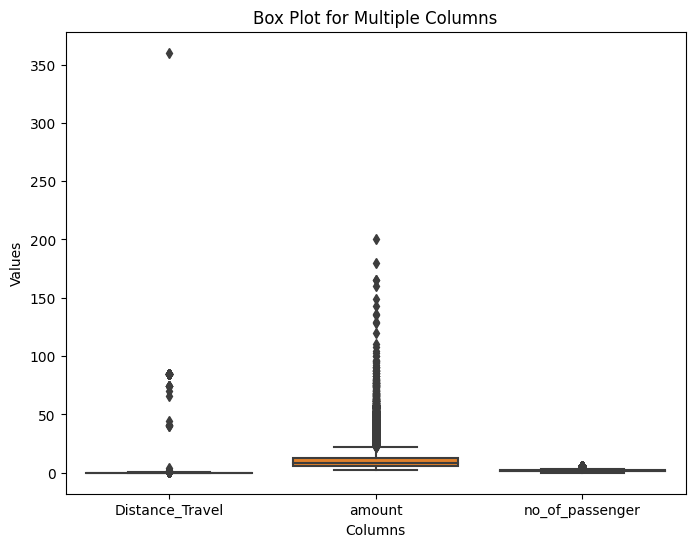

In [10]:
columns = ['Distance_Travel','amount', 'no_of_passenger']
plt.figure(figsize=(8, 6))  # Optional: Set the figure size
sns.boxplot(data=ln[columns])
plt.title('Box Plot for Multiple Columns')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.show()


In [11]:
ln.describe(percentiles = [0.01,.02,.03,.04,.05,.1,.25,.4,.5,.75,.9,.95,.96,.98,.99]).T


,count,mean,std,min,1%,2%,3%,4%,5%,10%,25%,40%,50%,75%,90%,95%,96%,98%,99%,max
amount,49990.0,11.366813,9.684697,2.500000,3.300000,3.500000,3.700000,4.000000,4.100000,4.500000,6.000000,7.300000,8.500000,12.500000,20.500000,30.500000,33.566400,46.500000,52.000000,200.000000
longitude_of_pickup,49990.0,-72.509468,10.394880,-75.423848,-74.014436,-74.010456,-74.008734,-74.007742,-74.006816,-74.002780,-73.992062,-73.985837,-73.981840,-73.967155,-73.950996,-73.871348,-73.862870,-73.137393,0.000000,40.783472
latitude_of_pickup,49990.0,39.933598,6.225469,-74.006893,0.000000,40.578523,40.645443,40.681107,40.702132,40.717985,40.734883,40.746855,40.752679,40.767360,40.779778,40.787795,40.790614,40.799604,40.807129,401.083332
longitude_of_dropoff,49990.0,-72.505803,10.403539,-84.654241,-74.015120,-74.011755,-74.009840,-74.008284,-74.007275,-74.002710,-73.991152,-73.984217,-73.980082,-73.963588,-73.944750,-73.873280,-73.864201,-73.434436,0.000000,40.851027
latitude_of_dropoff,49990.0,39.926903,6.012677,-74.006377,0.000000,40.569767,40.646891,40.672764,40.686076,40.713277,40.734375,40.747609,40.753373,40.768166,40.782897,40.794074,40.798798,40.810249,40.832503,43.415190
no_of_passenger,49990.0,1.667914,1.289250,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,4.000000,5.000000,5.000000,5.000000,6.000000,6.000000
X1,49990.0,39.933598,6.225469,-74.006893,0.000000,40.578523,40.645443,40.681107,40.702132,40.717985,40.734883,40.746855,40.752679,40.767360,40.779778,40.787795,40.790614,40.799604,40.807129,401.083332
X2,49990.0,39.926903,6.012677,-74.006377,0.000000,40.569767,40.646891,40.672764,40.686076,40.713277,40.734375,40.747609,40.753373,40.768166,40.782897,40.794074,40.798798,40.810249,40.832503,43.415190
Y1,49990.0,-72.509468,10.394880,-75.423848,-74.014436,-74.010456,-74.008734,-74.007742,-74.006816,-74.002780,-73.992062,-73.985837,-73.981840,-73.967155,-73.950996,-73.871348,-73.862870,-73.137393,0.000000,40.783472
Y2,49990.0,-72.505803,10.403539,-84.654241,-74.015120,-74.011755,-74.009840,-74.008284,-74.007275,-74.002710,-73.991152,-73.984217,-73.980082,-73.963588,-73.944750,-73.873280,-73.864201,-73.434436,0.000000,40.851027


In [12]:
tx1=ln.drop(columns=["longitude_of_pickup","latitude_of_pickup","longitude_of_dropoff","latitude_of_dropoff"])


In [13]:
tx1[["date","Time","Zone"]]=tx1["date_time_of_pickup"].str.split(pat=" ",n=-1 , expand=True)


In [14]:
tx2 = tx1.copy()

In [15]:
tx2["amount"] = np.where(tx2["amount"]>=52, 52, tx2["amount"])
tx2["no_of_passenger"] = np.where(tx2["no_of_passenger"]>=5, 4, tx2["no_of_passenger"])
tx2["Distance_Travel"] = np.where(tx2["Distance_Travel"]>=0.228218, 0.228218, tx2["Distance_Travel"])


In [16]:
tx2.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 49990 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   unique_id            49990 non-null  object 
 1   amount               49990 non-null  float64
 2   date_time_of_pickup  49990 non-null  object 
 3   no_of_passenger      49990 non-null  int64  
 4   X1                   49990 non-null  float64
 5   X2                   49990 non-null  float64
 6   Y1                   49990 non-null  float64
 7   Y2                   49990 non-null  float64
 8   Distance_Travel      49990 non-null  float64
 9   date                 49990 non-null  object 
 10  Time                 49990 non-null  object 
 11  Zone                 49990 non-null  object 
dtypes: float64(6), int64(1), object(5)
memory usage: 5.0+ MB


In [17]:
tx2["date"] = pd.to_datetime(tx2["date"])
tx2["date_time_of_pickup"] = pd.to_datetime(tx2["date_time_of_pickup"])


In [18]:
tx2["hours"] = tx2["date_time_of_pickup"].dt.hour
tx2["min"] = tx2["date_time_of_pickup"].dt.minute
tx2["second"] = tx2["date_time_of_pickup"].dt.second
tx2["year"] = tx2["date_time_of_pickup"].dt.year
tx2["day_of_the_month"] = tx2["date_time_of_pickup"].dt.day


In [19]:
def time_of_day(x):
    if x in range(6,12):
        return "Morning"
    elif x in range(12,17):
        return "Afternoon"
    elif x in range(17,21):
        return "Evening"
    else:
        return "Night"

In [20]:
tx2["time_of_day"] = tx2["hours"].apply(time_of_day)
tx2["day"] = tx2["date_time_of_pickup"].dt.day_name()
tx2["day_no"] = tx2["date_time_of_pickup"].dt.weekday

In [21]:
tx2 = tx2.loc[tx2['X1'].between(40, 42)]
tx2 = tx2.loc[tx2['Y1'].between(-75, -72)]
tx2 = tx2.loc[tx2['X2'].between(40, 42)]
tx2 = tx2.loc[tx2['Y2'].between(-75, -72)]
print(f'New number of observations: {tx2.shape[0]}')


New number of observations: 48944


In [22]:
def minkowski_distance(x1, x2, y1, y2, p):
    return ((abs(x2 - x1) ** p) + (abs(y2 - y1)) ** p) ** (1 / p)
     


In [23]:
tx2['manhattan_d'] = minkowski_distance(tx2['Y1'], 
                                       tx2['Y2'],
                                       tx2['X1'],
                                       tx2['X2'], 1)


In [24]:
tx2.select_dtypes(include='O').info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48944 entries, 0 to 49999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   unique_id    48944 non-null  object
 1   Time         48944 non-null  object
 2   Zone         48944 non-null  object
 3   time_of_day  48944 non-null  object
 4   day          48944 non-null  object
dtypes: object(5)
memory usage: 2.2+ MB


In [25]:
tx2.drop(columns=["unique_id","Time","Zone","date","min","second","date_time_of_pickup","X1","X2","Y1","Y2"],inplace =True)


In [26]:
tx3 = pd.get_dummies(tx2,columns=["time_of_day","day"])


In [27]:
tx3["Is_Weekend"] =np.where(tx3["day_no"].isin ([0,6]),1,0)
tx3["Is_starting_of_month"] = np.where(tx3["day_of_the_month"].isin ([1,2,3,4,5,6,7,8,9,10]),1,0)
tx3["Is_middle_of_month"] = np.where(tx3["day_of_the_month"].isin (range(11,21)),1,0)
tx3["Is_end_of_month"] = np.where(tx3["day_of_the_month"].isin (range(21,32)),1,0)
tx3["Is_leap_year"] = np.where((tx3["year"]%4 == 0),1,0)


In [28]:
tx3.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 48944 entries, 0 to 49999
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   amount                 48944 non-null  float64
 1   no_of_passenger        48944 non-null  int64  
 2   Distance_Travel        48944 non-null  float64
 3   hours                  48944 non-null  int64  
 4   year                   48944 non-null  int64  
 5   day_of_the_month       48944 non-null  int64  
 6   day_no                 48944 non-null  int64  
 7   manhattan_d            48944 non-null  float64
 8   time_of_day_Afternoon  48944 non-null  uint8  
 9   time_of_day_Evening    48944 non-null  uint8  
 10  time_of_day_Morning    48944 non-null  uint8  
 11  time_of_day_Night      48944 non-null  uint8  
 12  day_Friday             48944 non-null  uint8  
 13  day_Monday             48944 non-null  uint8  
 14  day_Saturday           48944 non-null  uint8  
 15  da

In [29]:
Y = tx3["amount"]
X = tx3.drop(columns=["amount"])


In [30]:
corr_data=X.corr()
pd.set_option("display.precision",3)
corr_data.style.background_gradient(cmap="coolwarm")


,no_of_passenger,Distance_Travel,hours,year,day_of_the_month,day_no,manhattan_d,time_of_day_Afternoon,time_of_day_Evening,time_of_day_Morning,time_of_day_Night,day_Friday,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday,Is_Weekend,Is_starting_of_month,Is_middle_of_month,Is_end_of_month,Is_leap_year
no_of_passenger,1.000000,0.016398,0.013628,-0.006069,0.006858,0.048013,0.013451,-0.006126,0.015378,-0.049548,0.038305,0.004191,-0.013072,0.038293,0.030675,-0.023507,-0.022525,-0.014359,0.013374,-0.005853,-0.002992,0.008815,-0.002681
Distance_Travel,0.016398,1.000000,-0.034170,0.026332,-0.000365,0.007823,0.936067,-0.005242,-0.030578,-0.032687,0.064199,-0.009436,0.019182,-0.002380,0.025075,0.000966,-0.010404,-0.021211,0.033954,-0.000431,0.003131,-0.002712,0.002067
hours,0.013628,-0.034170,1.000000,0.005022,-0.007159,-0.091323,-0.031199,0.037338,0.426330,-0.405137,-0.047724,0.006408,0.028591,-0.028032,-0.097366,0.027309,0.035515,0.025279,-0.052394,0.005809,-0.001271,-0.004495,-0.002412
year,-0.006069,0.026332,0.005022,1.000000,-0.011311,0.006056,0.016878,-0.010090,-0.001731,0.002923,0.008295,-0.004908,0.002549,0.010345,0.005902,-0.007050,-0.001478,-0.005092,0.006476,0.007664,0.002955,-0.010577,0.060997
day_of_the_month,0.006858,-0.000365,-0.007159,-0.011311,1.000000,0.007631,0.000328,0.010268,-0.010280,-0.001329,0.001180,0.005378,-0.000912,0.009001,0.001974,-0.008262,-0.002896,-0.004537,0.000806,-0.808469,-0.014775,0.817916,-0.003540
day_no,0.048013,0.007823,-0.091323,0.006056,0.007631,1.000000,0.006493,-0.002059,-0.039290,-0.090168,0.123646,0.210759,-0.606201,0.427476,0.587274,-0.006579,-0.415721,-0.216072,-0.018303,-0.007816,0.004322,0.003429,0.004884
manhattan_d,0.013451,0.936067,-0.031199,0.016878,0.000328,0.006493,1.000000,-0.004535,-0.026980,-0.025346,0.053256,-0.008657,0.017466,-0.000400,0.020642,0.000306,-0.009647,-0.018205,0.029242,-0.002388,0.003850,-0.001489,-0.000411
time_of_day_Afternoon,-0.006126,-0.005242,0.037338,-0.010090,0.010268,-0.002059,-0.004535,1.000000,-0.304715,-0.315461,-0.355676,-0.014292,0.011614,-0.001590,0.017506,-0.012184,0.009756,-0.008961,0.022334,-0.003855,-0.008329,0.012183,-0.007935
time_of_day_Evening,0.015378,-0.030578,0.426330,-0.001731,-0.010280,-0.039290,-0.026980,-0.304715,1.000000,-0.310124,-0.349658,-0.000306,0.019255,-0.016476,-0.032645,0.007130,0.012703,0.010171,-0.010114,0.007754,0.002288,-0.009998,-0.000229
time_of_day_Morning,-0.049548,-0.032687,-0.405137,0.002923,-0.001329,-0.090168,-0.025346,-0.315461,-0.310124,1.000000,-0.361990,0.011209,0.024324,-0.070150,-0.067273,0.028682,0.034454,0.038446,-0.032679,-0.001018,0.006096,-0.005102,-0.000595


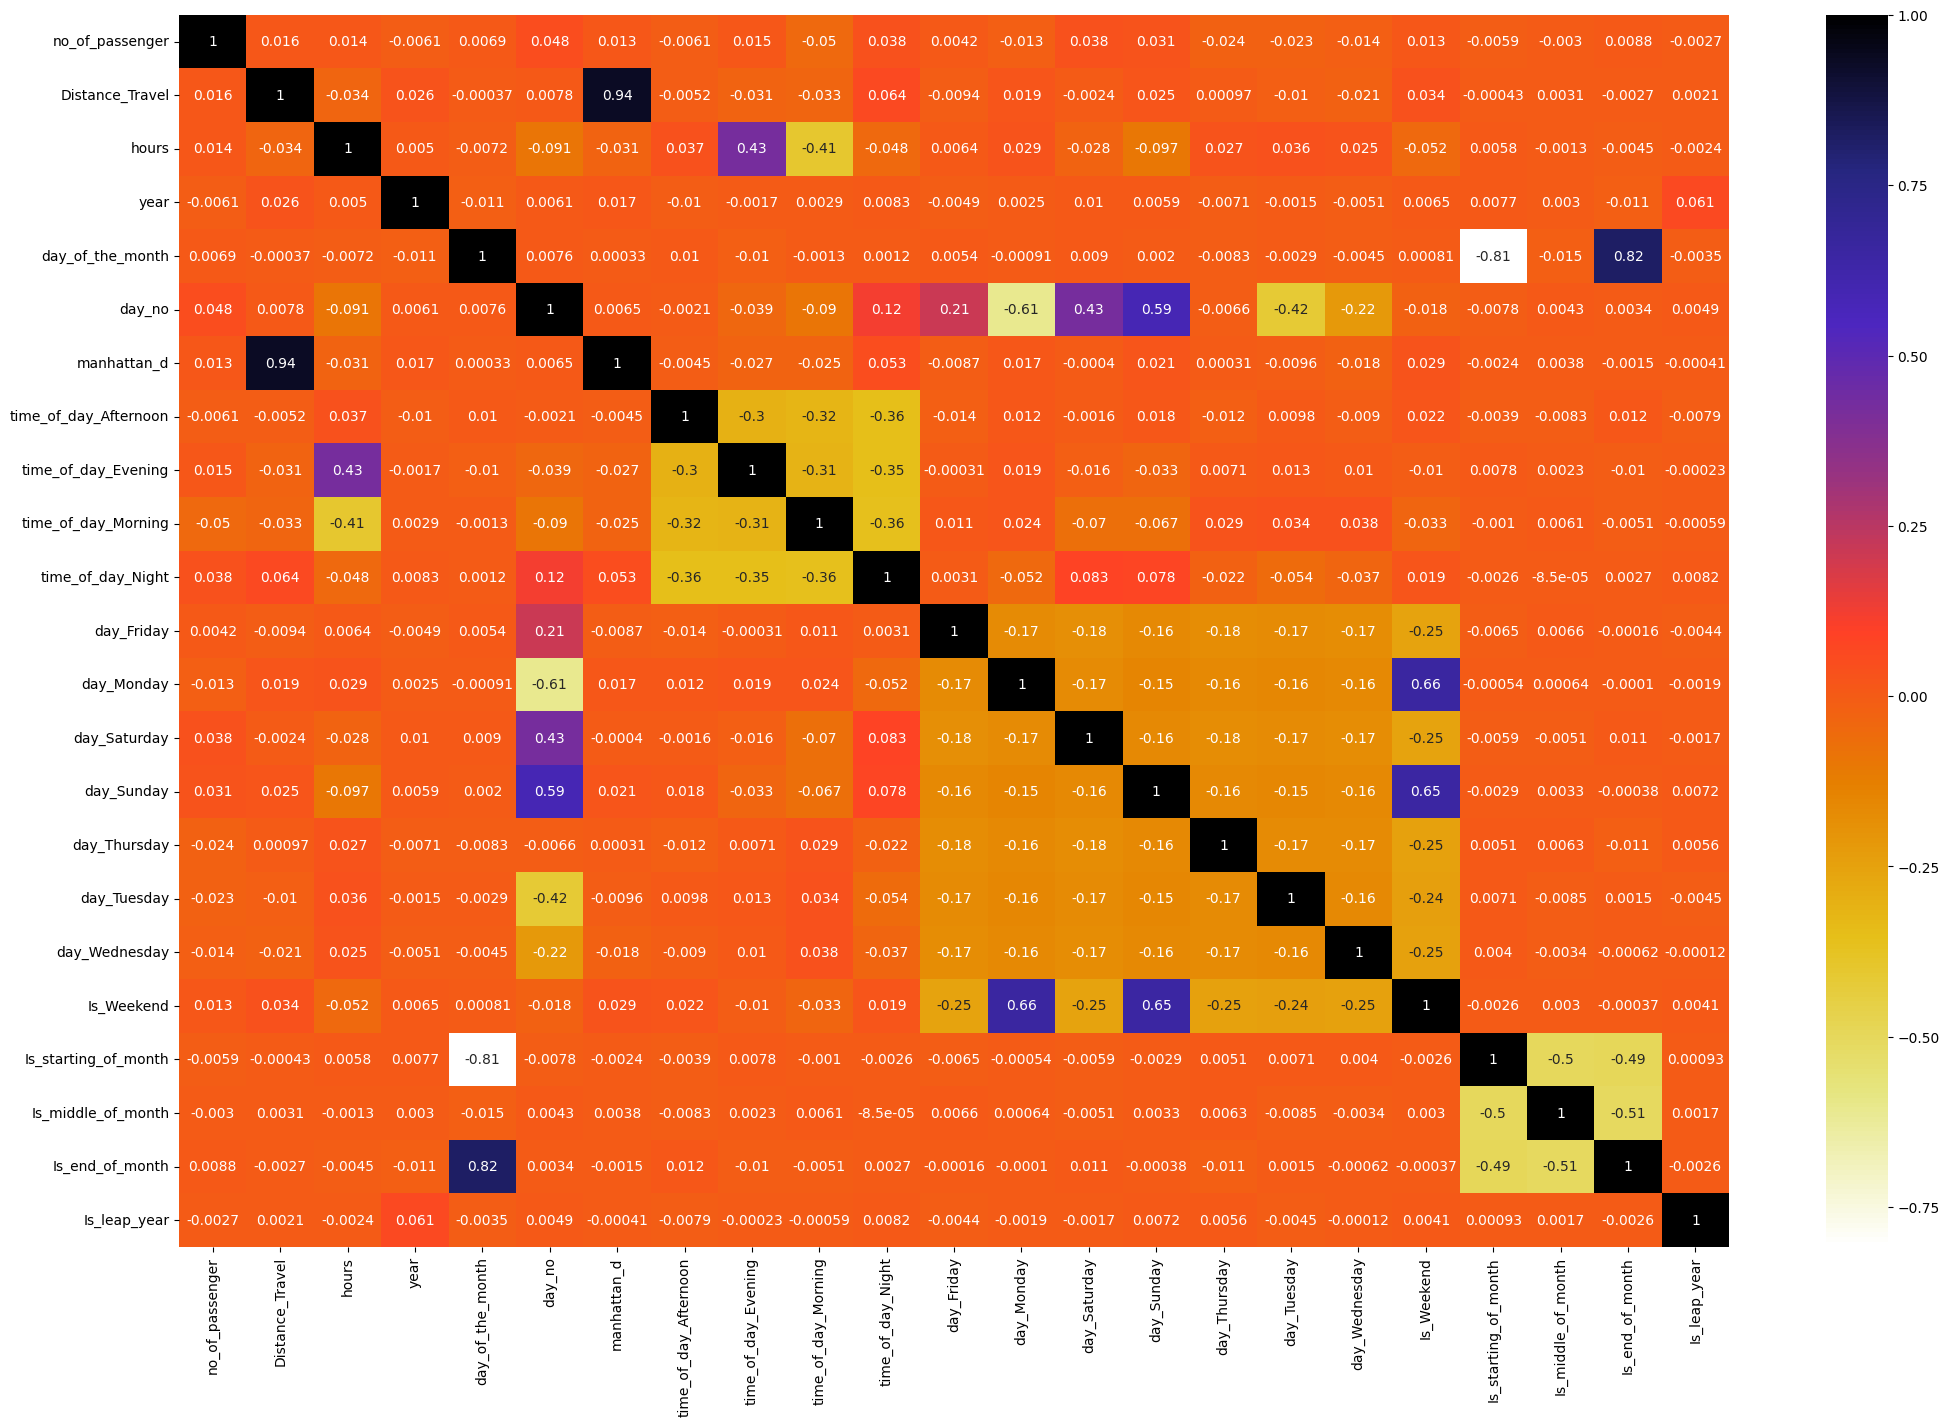

In [31]:
plt.figure(figsize=(25,16))
sns.heatmap(corr_data, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()


In [32]:
X_train,X_test,Y_train,Y_test =train_test_split(X,Y, test_size = 0.2 , random_state = 1)


**Fitting Models**

In [ ]:
model1 = LinearRegression()
model1.fit(X_train,Y_train)


In [34]:
X_train.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 39155 entries, 15614 to 33714
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   no_of_passenger        39155 non-null  int64  
 1   Distance_Travel        39155 non-null  float64
 2   hours                  39155 non-null  int64  
 3   year                   39155 non-null  int64  
 4   day_of_the_month       39155 non-null  int64  
 5   day_no                 39155 non-null  int64  
 6   manhattan_d            39155 non-null  float64
 7   time_of_day_Afternoon  39155 non-null  uint8  
 8   time_of_day_Evening    39155 non-null  uint8  
 9   time_of_day_Morning    39155 non-null  uint8  
 10  time_of_day_Night      39155 non-null  uint8  
 11  day_Friday             39155 non-null  uint8  
 12  day_Monday             39155 non-null  uint8  
 13  day_Saturday           39155 non-null  uint8  
 14  day_Sunday             39155 non-null  uint8  
 15

In [ ]:
model1 = LinearRegression()
model1.fit(X_train,Y_train)

In [36]:
model1.score(X_train,Y_train)


0.8016206360132466

In [37]:
model1.score(X_test,Y_test)


0.7944351309801696

In [38]:
Y_pred = model1.predict(X_test)

# Evaluate 
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

# Print the evaluation metrics
print("Mean Squared Error: ", mse)
print("R-squared: ", r2)


Mean Squared Error:  16.376162454597473
R-squared:  0.7944351309801696


In [ ]:
#model 2 >> DecisionTreeRegressor
model2 = DecisionTreeRegressor()
model2.fit(X_train,Y_train)

In [41]:
model2.score(X_train,Y_train)


0.9999993644607224

In [42]:
model2.score(X_test,Y_test)


0.6280257267167928

In [43]:
Y_pred2 = model2.predict(X_test)

# Evaluate the model
mse = mean_squared_error(Y_test, Y_pred2)
r2 = r2_score(Y_test, Y_pred2)

# Print the evaluation metrics
print("Mean Squared Error: ", mse)
print("R-squared: ", r2)


Mean Squared Error:  29.63303582592706
R-squared:  0.6280257267167928


In [ ]:
AdaBoostRegressor()


In [46]:
model3.score(X_train,Y_train)


0.63646641298324

In [48]:
model3.score(X_test,Y_test)


0.6244569679590608

In [49]:
Y_pred3 = model3.predict(X_test)

# Evaluate the model
mse = mean_squared_error(Y_test, Y_pred3)
r2 = r2_score(Y_test, Y_pred3)

# Print the evaluation metrics
print("Mean Squared Error: ", mse)
print("R-squared: ", r2)


Mean Squared Error:  29.917338165410218
R-squared:  0.6244569679590608


In [ ]:
#model 4 >> GradientBoostingRegressor
model4 = GradientBoostingRegressor()
model4.fit(X_train,Y_train)

In [ ]:
GradientBoostingRegressor()

In [54]:
model4.score(X_train,Y_train)


0.8473592511313894

In [56]:
model4.score(X_test,Y_test)

0.8338027889764772

In [57]:
Y_pred4 = model4.predict(X_test)

# Evaluate the model
mse = mean_squared_error(Y_test, Y_pred4)
r2 = r2_score(Y_test, Y_pred4)

# Print the evaluation metrics
print("Mean Squared Error: ", mse)
print("R-squared: ", r2)


Mean Squared Error:  13.239969164963073
R-squared:  0.8338027889764772


In [ ]:
#model 5 >> RandomForestRegressor
model5 = RandomForestRegressor()
model5.fit(X_train,Y_train)

In [ ]:
RandomForestRegressor()

In [60]:
model5.score(X_train,Y_train)


0.9756610227655681

In [61]:
model5.score(X_test,Y_test)


0.8189188823876122

In [62]:
Y_pred5 = model5.predict(X_test)

# Evaluate the model
mse = mean_squared_error(Y_test, Y_pred5)
r2 = r2_score(Y_test, Y_pred5)

# Print the evaluation metrics
print("Mean Squared Error: ", mse)
print("R-squared: ", r2)


Mean Squared Error:  14.425683793248087
R-squared:  0.8189188823876122


Random Forest got good fit